<a href="https://colab.research.google.com/github/oneinmany/Anomaly-Detection-in-Credit-Card-Transactions/blob/main/Anomaly_Detection_in_Credit_Card_transactions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, sys
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [2]:
Data = pd.read_csv("/content/creditcard.csv",low_memory=False)
Data = Data.drop(["Time"],axis=1)
Data = Data.dropna()

In [3]:
Data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,...,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,-0.333640,0.308476,0.836894,0.013009,-0.029243,0.052876,0.146726,-0.071273,0.055417,-0.057111,...,0.010574,-0.082815,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1.352136,1.180507,0.981122,1.418904,1.207777,1.286769,1.090854,1.294801,0.918921,0.993070,...,0.855909,0.635547,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,-6.042641,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,-1.030830,-0.155758,0.287084,-0.908489,-0.573860,-0.735939,-0.278836,-0.205378,-0.474080,-0.550082,...,-0.211797,-0.512547,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,-0.451438,0.409390,0.884228,0.099491,-0.090452,-0.209928,0.162196,0.028901,0.031868,-0.141179,...,-0.053211,-0.064375,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,1.070629,0.920877,1.433776,0.982710,0.396756,0.449680,0.634358,0.299371,0.620945,0.291682,...,0.102520,0.345393,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,11.906868,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [4]:
Data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,...,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,-0.333640,0.308476,0.836894,0.013009,-0.029243,0.052876,0.146726,-0.071273,0.055417,-0.057111,...,0.010574,-0.082815,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1.352136,1.180507,0.981122,1.418904,1.207777,1.286769,1.090854,1.294801,0.918921,0.993070,...,0.855909,0.635547,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,-6.042641,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,-1.030830,-0.155758,0.287084,-0.908489,-0.573860,-0.735939,-0.278836,-0.205378,-0.474080,-0.550082,...,-0.211797,-0.512547,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,-0.451438,0.409390,0.884228,0.099491,-0.090452,-0.209928,0.162196,0.028901,0.031868,-0.141179,...,-0.053211,-0.064375,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,1.070629,0.920877,1.433776,0.982710,0.396756,0.449680,0.634358,0.299371,0.620945,0.291682,...,0.102520,0.345393,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,11.906868,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


**Data Distribution**

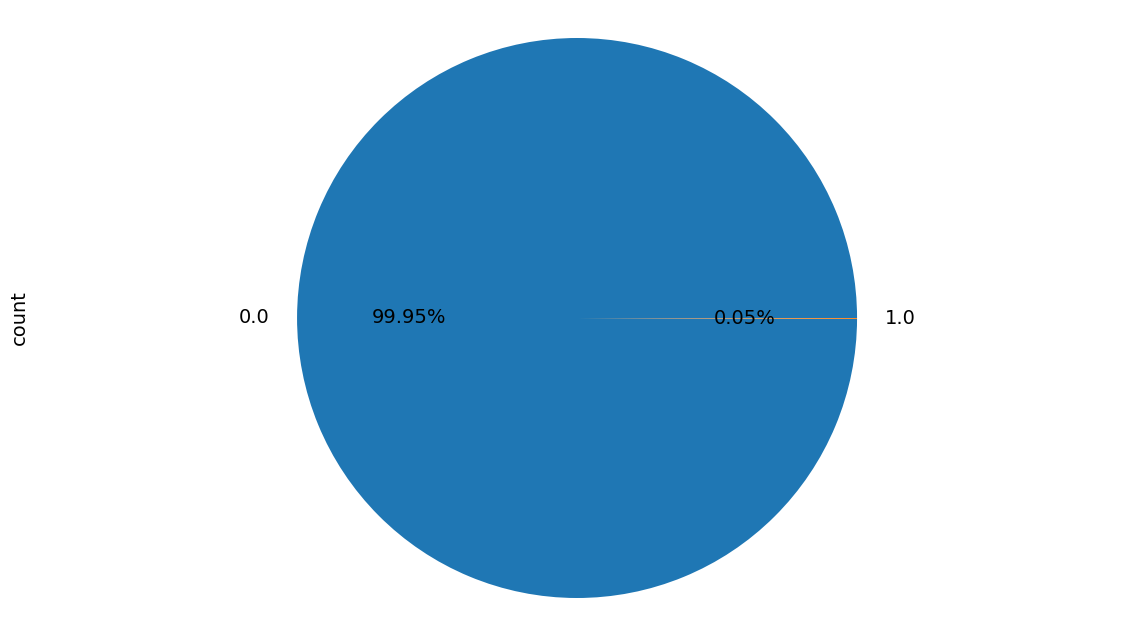

 Target Result 
 Class
0.0    3970
1.0       2
Name: count, dtype: int64 




In [5]:
plt.figure(figsize=(14,8))
plt.rc('font', size=14)          # controls default text sizes
Data['Class'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.show()
print(" Target Result \n",Data['Class'].value_counts(),"\n\n")

**Correlation**

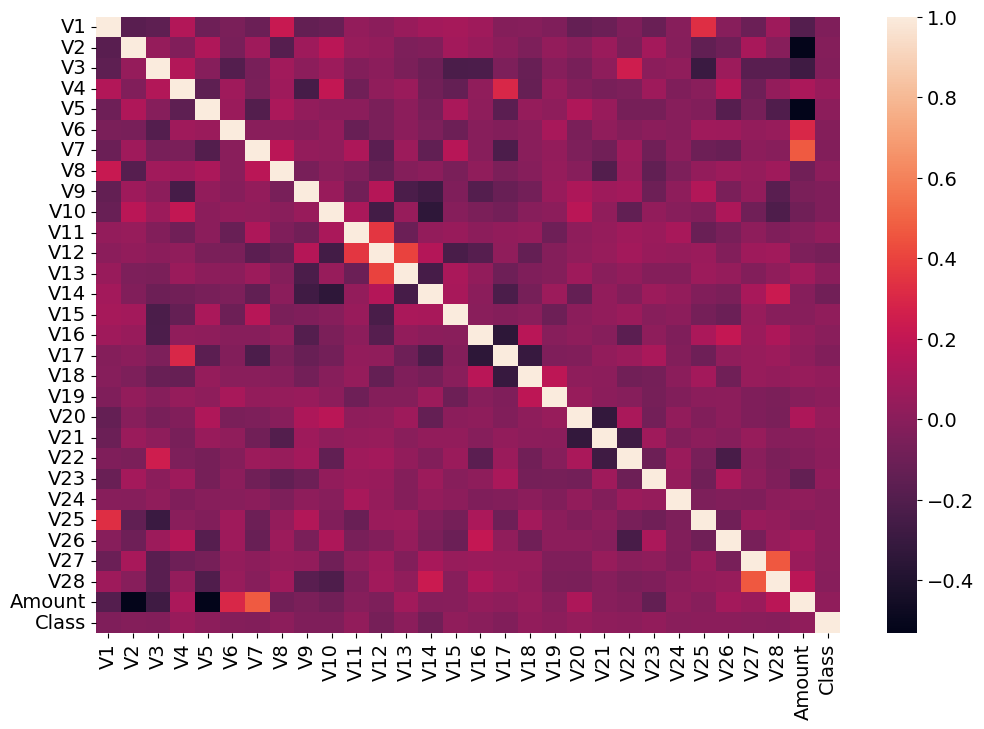

Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.


In [6]:
plt.figure(figsize=(12,8))

sns.heatmap(Data.corr())
plt.show()

print("Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.")

**Splitting the dataset into the Training set and Test **

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data.iloc[:,:-1], Data.iloc[:,-1], test_size = 0.2, random_state = 1)

**Dealing with imbalanced data**

In [8]:
!pip install --upgrade imbalanced-learn

In [9]:
# check version number
import imblearn
print(imblearn.__version__)

0.12.4


In [10]:
# import the Random Under Sampler object.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# create the object.
under_sampler = RandomUnderSampler()
over_sampler = RandomOverSampler()

# fit the object to the training data.
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

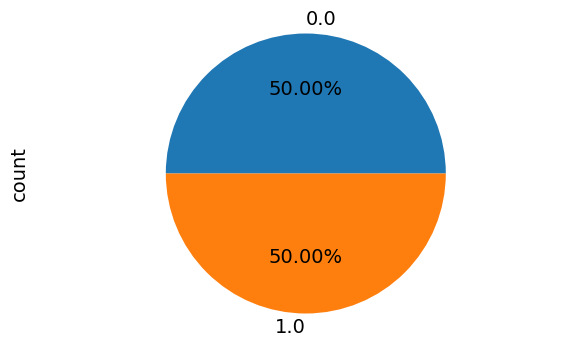

 Target Result 
 Class
0.0    3176
1.0    3176
Name: count, dtype: int64 




In [11]:
plt.figure(figsize=(7,4))
plt.rc('font', size=14)          # controls default text sizes
y_train_over.value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.show()
print(" Target Result \n",y_train_over.value_counts(),"\n\n")

In [12]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [13]:
from catboost import CatBoostClassifier
CLF_over = CatBoostClassifier(silent=True)
CLF_under = CatBoostClassifier(silent=True)

In [14]:
# Fit the data to the model
CLF_under.fit(X_train_under, y_train_under)
CLF_over.fit(X_train_over, y_train_over)

In [15]:
y_pred_under = CLF_under.predict(X_test)
y_pred_over = CLF_over.predict(X_test)

**Oversampling results**

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred_over, y_true=y_test)
print(cm)
print("Accuracy:",accuracy_score(y_pred=y_pred_over, y_true=y_test))
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("f1:",f1_score(y_test, y_pred_over))
print("Recall:",recall_score(y_pred=y_pred_over, y_true=y_test))
print("Precision:",precision_score(y_pred=y_pred_over, y_true=y_test))

[[794   0]
 [  1   0]]
Accuracy: 0.9987421383647799
f1: 0.0
Recall: 0.0
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Undersampling results**

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred_under, y_true=y_test)
print(cm)
print("Accuracy:",accuracy_score(y_pred=y_pred_under, y_true=y_test))
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("f1:",f1_score(y_test, y_pred_under))
print("Recall:",recall_score(y_pred=y_pred_under, y_true=y_test))
print("Precision:",precision_score(y_pred=y_pred_under, y_true=y_test))

[[765  29]
 [  1   0]]
Accuracy: 0.9622641509433962
f1: 0.0
Recall: 0.0
Precision: 0.0


**Importance of each features on model output**

In [18]:
!pip install shap

In [19]:
import shap
explainer = shap.TreeExplainer(CLF_over)
shap_values = explainer.shap_values(X_train_over)

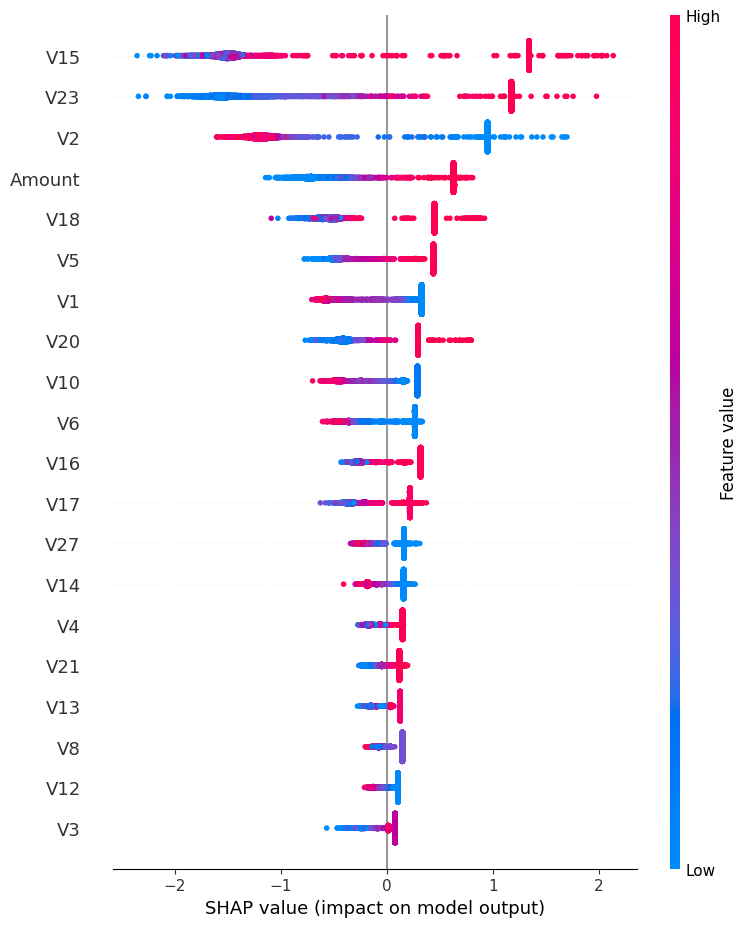

In [20]:
shap.summary_plot(shap_values, X_train_over)

**Deep learning and autoencoder**
AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer or code) and then decoding the data to reconstruct the original input. The bottleneck layer (or code) holds the compressed representation of the input data. The number of hidden units in the code is called code size.

AutoEncoders are widely used in anomaly detection. The reconstruction errors are used as the anomaly scores.

To detect anomalies in a high-dimension dataset using autoencoders, the following steps will be performed:

During the training, input is only normal transactions. The bottleneck layer will learn the latent representation of the normal input data.

The Decoder will use the bottleneck layers output to reconstruct the normal transactions of the original input data.

There are differences between a fraudulent transaction and a normal transaction. The Autoencoder will have difficulty reconstructing the fraudulent transaction, resulting in a high reconstruction error.

You can flag a new transaction is fraudulent based on a specified threshold value for the reconstruction error.

1_ce89U6z-MhgGRln9VRAMxQ (1).png

**Normalizing data**

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_data = sc.fit_transform(X_train)
test_data = sc.transform(X_test)
train_labels = y_train
test_labels = y_test

**Splitting normal and fraud data**

In [22]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#creating normal and fraud datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
anomalous_train_data = train_data[train_labels]
anomalous_test_data = test_data[test_labels]
print(" No. of records in Fraud Train Data=",len(anomalous_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(anomalous_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 1
 No. of records in Normal Train data= 3176
 No. of records in Fraud Test Data= 1
 No. of records in Normal Test data= 794


**Model Structure**

In [23]:
nb_epoch = 50
batch_size = 128
input_dim = normal_train_data.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4
learning_rate = 1e-7

In [24]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                                activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 29)                  │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,139 (4.45 KB)

 Trainable params: 1,139 (4.45 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.keras",
                                         mode='min',
                                         monitor='val_loss',
                                         verbose=2,
                                         save_best_only=True)

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True)

In [28]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

**Training**

In [29]:
history = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/50
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2870 
Epoch 1: val_loss improved from inf to 0.22708, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2856 - val_loss: 0.2271
Epoch 2/50
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2307
Epoch 2: val_loss improved from 0.22708 to 0.15448, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2134 - val_loss: 0.1545
Epoch 3/50
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1477  
Epoch 3: val_loss improved from 0.15448 to 0.09321, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1453 - val_loss: 0.0932
Epoch 4/50
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0900 
Epoch 4: val_loss improved from 0.09321 to 0.04427, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0887 - val_loss: 0.0443
Epoch 5/50
15/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0518  
Epoch 5: val_loss improved from 0.04427

In [32]:
from tensorflow import keras
import tensorflow as tf

# Load the model with custom objects
autoencoder = keras.models.load_model("best_model.keras", custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU})

# Now the model is loaded and can be used for inference


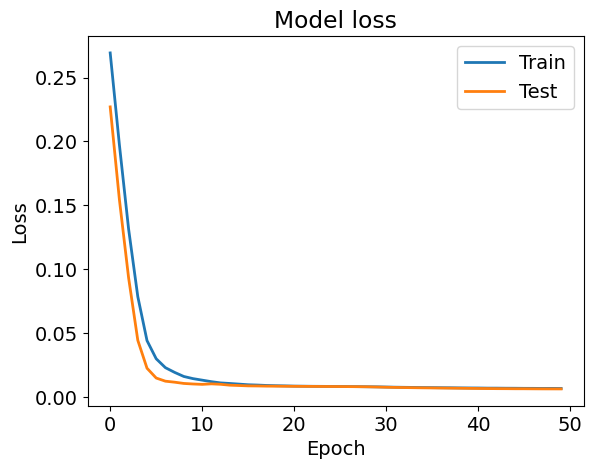

In [33]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


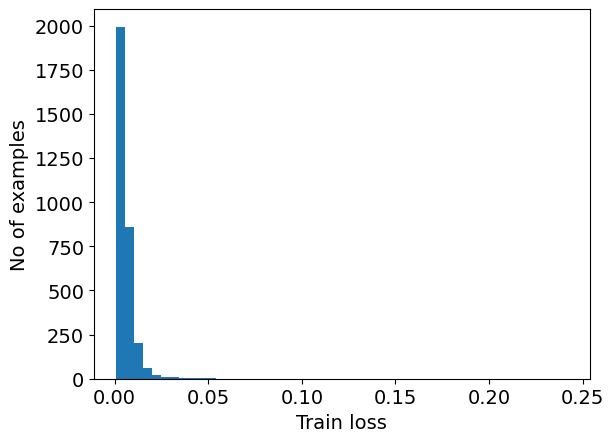

In [34]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mse(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

# **Choosing a threshold**

In [35]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.012911374167419176


# **Results**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


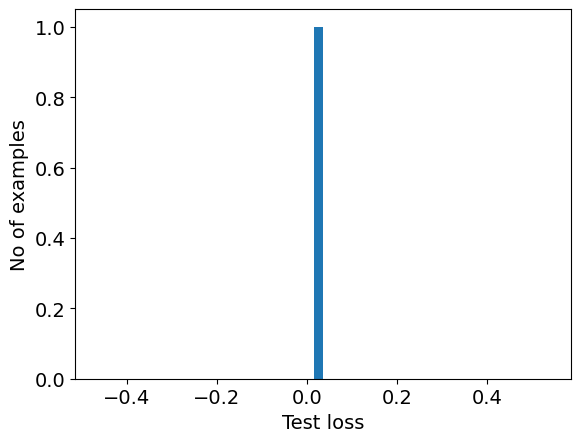

In [36]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mse(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mse(reconstructions, data)
  return tf.math.logical_not (tf.math.less(loss, threshold))

def print_stats(predictions, labels):
  conf_matrix = confusion_matrix(labels, predictions)
  plt.figure(figsize=(8, 6))
  LABELS = ["Normal","Anomalous"]
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

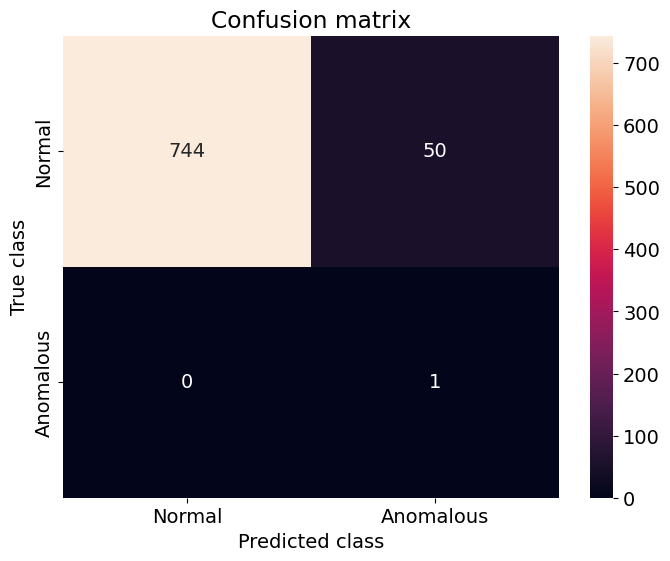

Accuracy = 0.9371069182389937
Precision = 0.0196078431372549
Recall = 1.0


In [38]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

In [39]:
reconstructions = autoencoder.predict(test_data)
mse = tf.keras.losses.mse(reconstructions, test_data)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


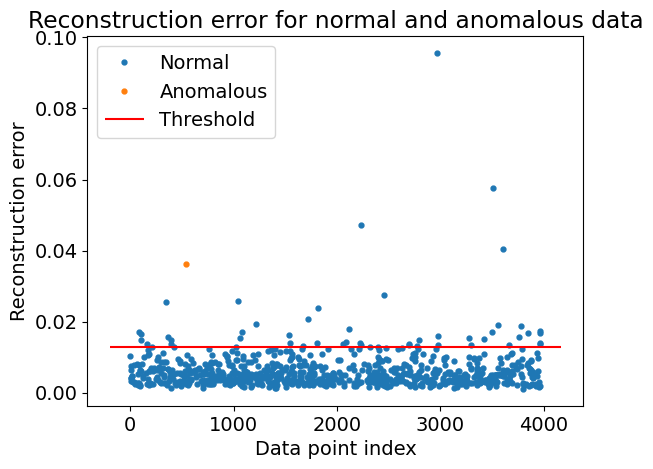

In [40]:
threshold_fixed = threshold
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalous" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and anomalous data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();